In [1]:
import pandas as pd
import acquire as aqr
import prepare as prep
import wrangle as wr
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
prepped_telco = prep.prep_telco()

In [3]:
prepped_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_contract,one_yr_contract,two_yr_contract,dsl,fiber,no_internet,bank_transfer,credit_card,electronic_check,mailed_check
0,0016-QLJIS,Female,0,1,1,65,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1
1,0017-DINOC,Male,0,0,0,54,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
2,0019-GFNTW,Female,0,0,0,56,0,0,1,1,...,0,0,1,1,0,0,1,0,0,0
3,0056-EPFBG,Male,0,1,1,20,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,0078-XZMHT,Male,0,1,0,72,1,1,0,1,...,0,0,1,1,0,0,1,0,0,0


In [4]:
train, validate, test  = prep.split_telco(prepped_telco)

train_encoded, shape: (3943, 33)
validate_encoded, shape: (1691, 33)
test_encoded, shape: (1409, 33)


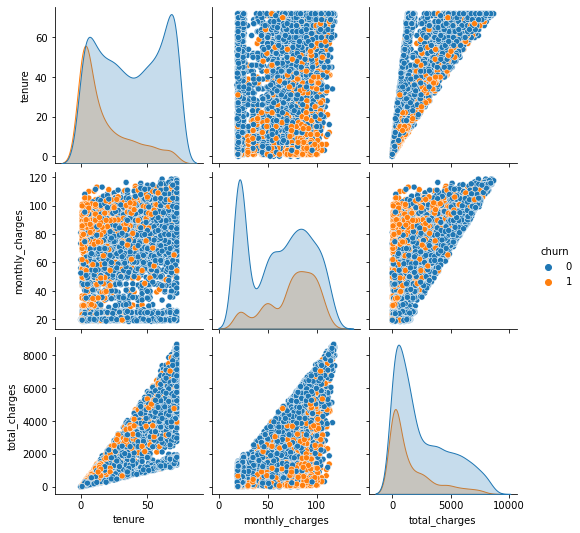

In [5]:
sns.pairplot(train[['churn','tenure','monthly_charges', 'total_charges']], hue='churn')


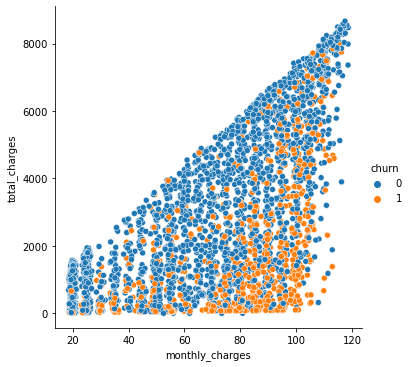

In [6]:
sns.relplot(x='monthly_charges', y ='total_charges', data = train, hue='churn', kind='scatter')

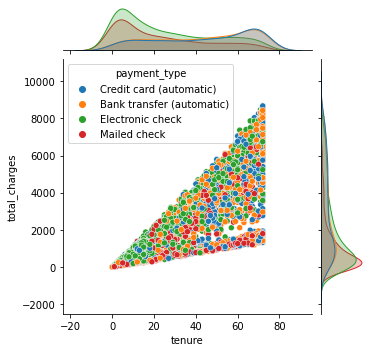

In [7]:
sns.jointplot(x="tenure", y="total_charges", data=train, hue='payment_type', kind='scatter', height=5)
plt.show()

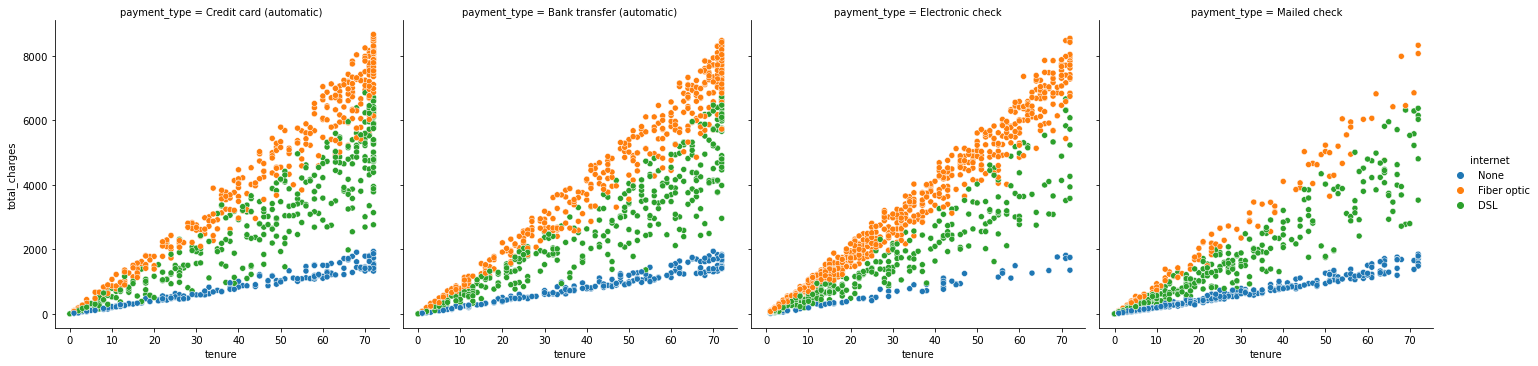

In [8]:
sns.relplot(x="tenure", y="total_charges", data=train, hue='internet', col='payment_type') # 

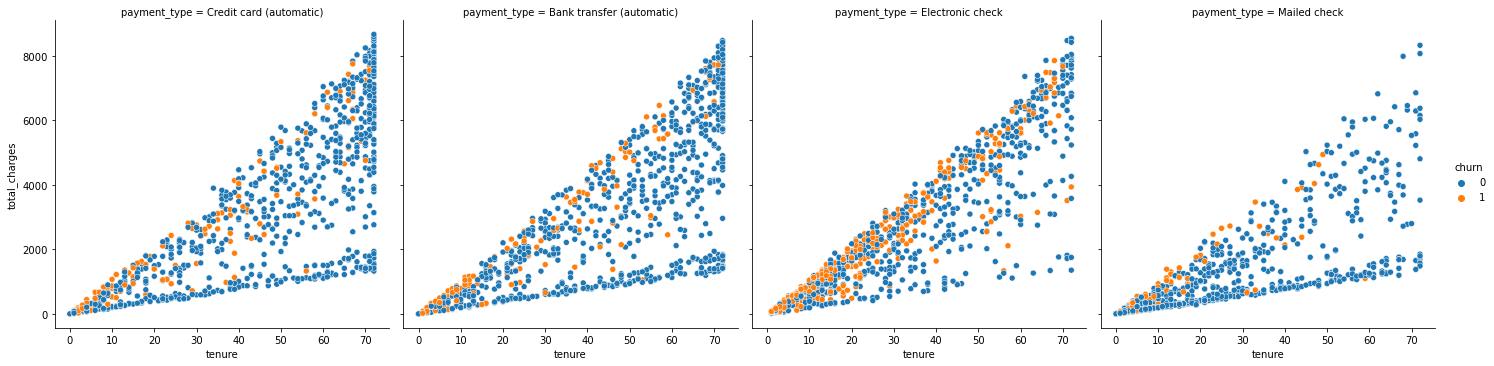

In [9]:
sns.relplot(x="tenure", y="total_charges", data=train, hue='churn', col='payment_type') # 

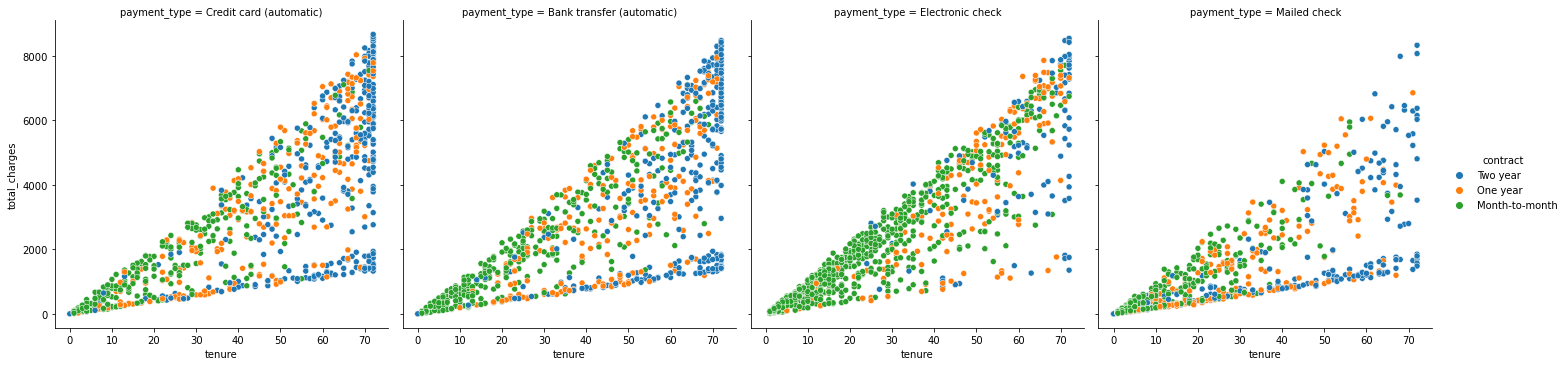

In [10]:
sns.relplot(x="tenure", y="total_charges", data=train, hue='contract', col='payment_type') # 

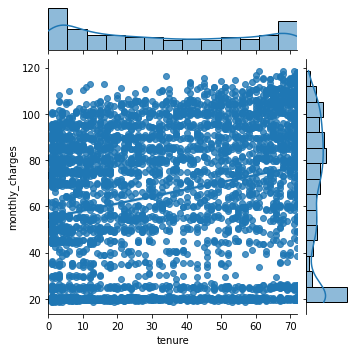

In [11]:
sns.jointplot(x="tenure", y="monthly_charges", data=train, kind='reg', height=5)
plt.show()

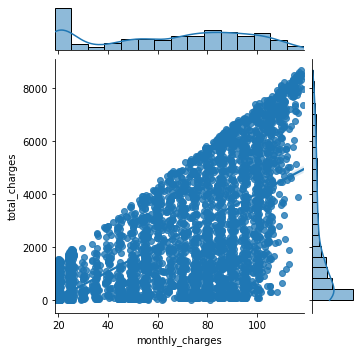

In [12]:
sns.jointplot(x="monthly_charges", y="total_charges", data=train, kind='reg', height=5)
plt.show()

In [13]:
train['months_to_years'] = train.tenure / 12

In [14]:
zillow_df = wr.acquire_zillow()

In [15]:
zillow_df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


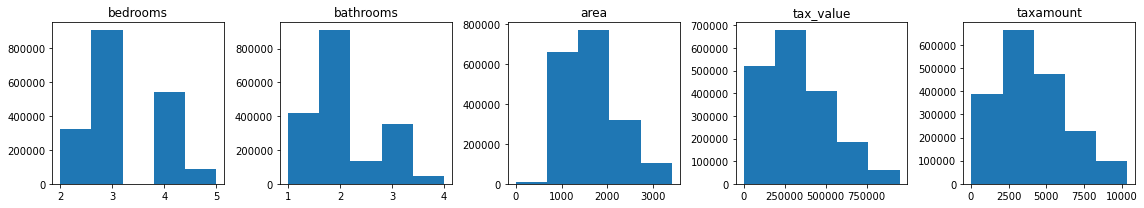

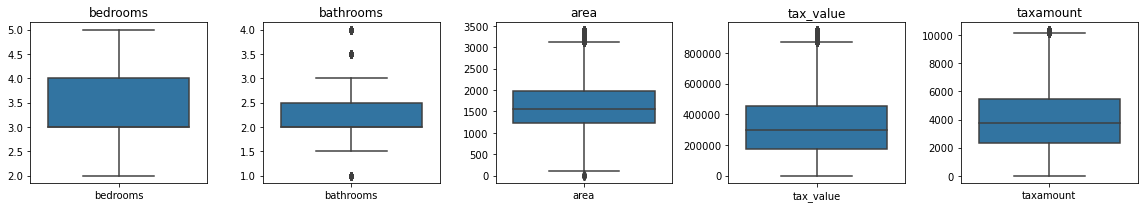

/Users/christianfreeman/Desktop/codeup-data-science/regression-exercises/wrangle.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['year_built']] = imputer.transform(train[['year_built']])
/Users/christianfreeman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/christianfreeman/Desktop/codeup-data-science/regression-exercises/wrangle.py:158: SettingWithCopyWarning

In [16]:
data = wr.prepare_zillow(zillow_df)